In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from rocketpy import Function
from mpl_toolkits.mplot3d import Axes3D

In [19]:
df = pd.read_csv(r'Lift coeff completo.csv')

df.dropna(inplace = True)

# Ennvironment
rho = 1.09

# Desired Parameters
timeMax = 3
thetaDotMax = 9 #given in radians per second
thetaDotDotMax = (0 - thetaDotMax)/timeMax

# Europa
J = 0.077
r = 127/2000

# Fin set
N = 4
root = 90 / 1000
tip = 40 / 1000
span = 80 / 1000
delta = 3

# Canards set 
n = 4
Cr = 40 / 1000
Ct = 40 / 1000
s = 70 / 1000
arm = 10/1000
alfa = 11

class Canards:
    def __init__(self, N, root, tip, span, radius, arm=0):
        self.N = N
        self.root = root
        self.tip = tip
        self.span = span
        self.radius = radius
        self.arm = arm
        self.Aref =np.pi * radius**2    
        self.Afins = (root + tip) * span / 2; # fin area
        self.AR= 2 * (span**2) / self.Afins #Aspec ratio
        self.gamac = np.arctan( (root - tip) / (2 * span) ); # mid chord angle
        self.Yt = (radius + span/3 * ((root + 2 * tip) / (root + tip))) # it is the Fin's center of pressure location

    def setCnalfa0(self, data):
        '''data must be a pandas dataframe'''
        data.dropna(inplace = True)
        self.Cnalfa0 = data

In [20]:
def cnalfa(cnalfa0, Cr, Ct, s, r, N):
    Aref = np.pi * r**2
    Af = (Cr + Ct) * s / 2; # fin area
    AR= 2 * (s**2) / Af
    gamac = np.arctan( (Cr - Ct) / (2 * s) ); # mid chord angle
    FD = 2 * np.pi * AR / (cnalfa0 *np.cos(gamac))
    return cnalfa0 * FD * (Af/Aref) * np.cos(gamac) * (N/2) / (2 + FD * ( 1 + (4/FD**2) )**0.5) 

Cana = Canards(n, Cr, Ct, s, r, arm)
Cana.setCnalfa0(df)

In [21]:
# Creating points for canard A coefficient
alpha = [a/2 for a in range(0, 30)]
V = [v/20 for v in range(2, 16)]

X,Y = np.meshgrid(alpha, V)

Z = []
for i in range(len(X)):
    temp=[]
    for j in range(len(X[i])):
        if Y[i][j]*10 % 1!= 0:
            temp.append(2 * Cana.Yt * cnalfa(float(df['M='+ str(Y[i][j])][X[i][j]*2]), Cana.root, Cana.tip, Cana.span, Cana.radius, Cana.N) / (2 * Cana.radius)  )
        else:
            temp.append(2 * Cana.Yt * cnalfa(float(df['M='+ str(Y[i][j]) + '0'][X[i][j]*2] ), Cana.root, Cana.tip, Cana.span, Cana.radius, Cana.N) / (2 * Cana.radius))
    Z.append(temp)
ZC = np.array(Z)

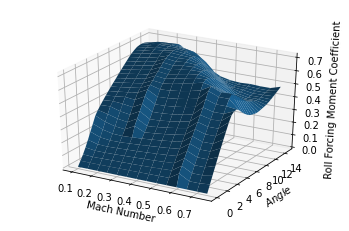

In [27]:
fig = plt.figure()
sub = fig.add_subplot(111,projection = "3d")
sub.plot_surface(Y, X, ZC)
sub.set_xlabel('Mach Number')
sub.set_ylabel('$Angle$')
sub.set_zlabel('Roll Forcing Moment Coefficient')
sub.dist = 11
fig.show()
plt.savefig('Curva 3D')

In [23]:
#print(df)

In [24]:
#t = df['M=0.75']
#print(t)